In [2]:
import pandas as pd
import numpy as np
import glob
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
list = glob.glob('./1107/*')
list.sort()

In [ ]:
realCIR = np.empty((0,64))
imagCIR = np.empty((0,64))
GT = np.empty(0)

In [ ]:
list

In [ ]:
for i in range(len(list)):
    data = pd.read_excel(list[i])
    data = np.array(data.iloc[:64,:]).T
    realCIR = np.vstack((realCIR, data[0::2, :].astype(dtype=np.float32)))
    imagCIR = np.vstack((imagCIR, data[1::2, :].astype(dtype=np.float32)))
    GT = np.append(GT, np.ones(500) * i)
    
magCIR = np.sqrt(realCIR ** 2 + imagCIR ** 2)

In [ ]:
magCIR.shape

In [ ]:
GT.shape

In [2]:
realCIR = np.load('real.npy')
imagCIR = np.load('imag.npy')
magCIR = np.load('dataset.npy')
GT = np.load('label.npy')

In [5]:
magCIR.shape

(33000, 64)

In [6]:
GT.shape

(33000,)

In [ ]:
tan = np.arctan2(imagCIR, realCIR)
diff = tan[:,:63] - tan[:, 1:]
magCIR = np.concatenate((magCIR, diff), axis=1)

In [ ]:
magCIR.shape

In [3]:
import matplotlib.pylab as plt

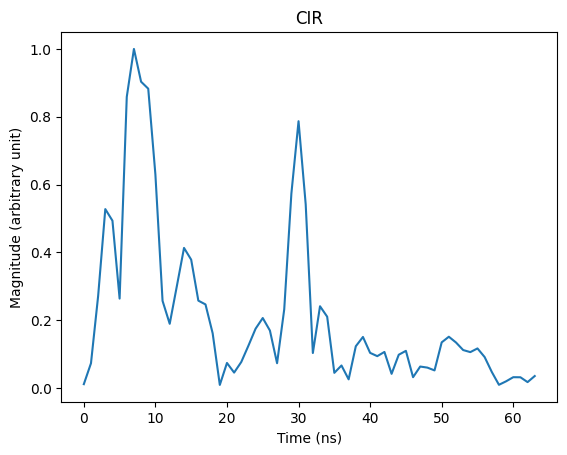

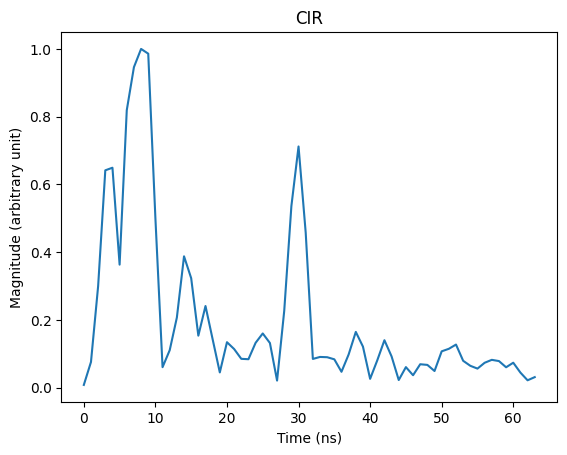

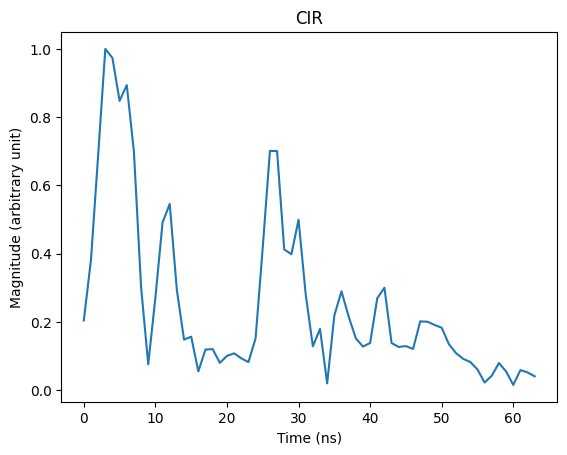

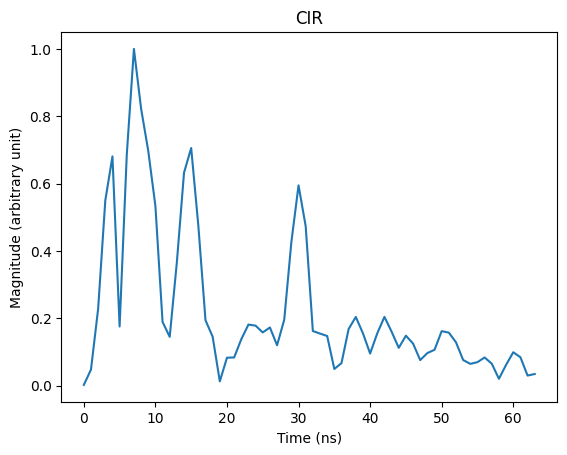

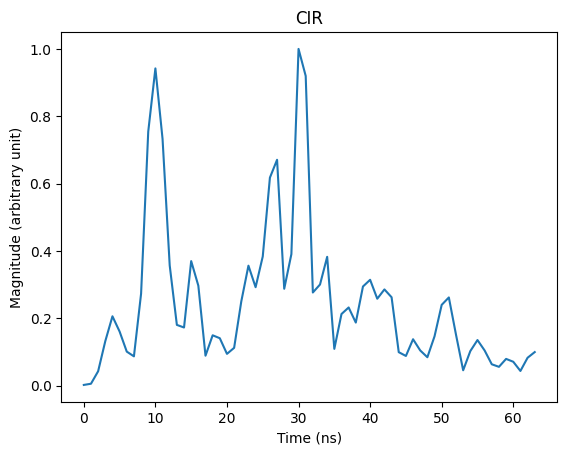

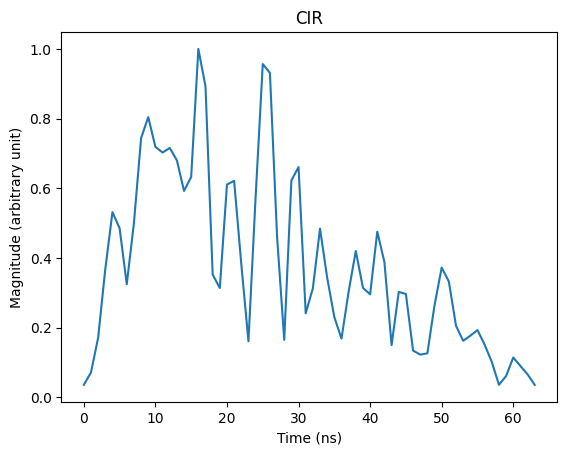

In [7]:
for i in range(6):
    max = np.max(magCIR[i*500])
    magCIR[i*500] /= max
    plt.figure()
    plt.plot(np.arange(64), magCIR[i*500])
    plt.xlabel('Time (ns)')
    plt.ylabel('Magnitude (arbitrary unit)')
    plt.title('CIR')
    plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convloution
        # kernel
        self.fc1 = nn.Linear(64, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 16)
    
    def forward(self, x):
        print("연산 전", x.size())
        x = F.relu(self.fc1(x))
        print("fc1 연산 후", x.size())
        x = F.relu(self.fc2(x))
        print("fc2 연산 후", x.size())
        x = F.relu(self.fc3(x))
        print("fc3 연산 후", x.size())
        return x
        

In [ ]:
net = DNN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [ ]:
net.train()

In [ ]:
for epoch in range(10):
    

In [ ]:
cnn.train()  # 학습을 위함
for epoch in range(10):
    for index, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()  # 기울기 초기화
        output = cnn(data)
        loss = criterion(output, target)
        loss.backward()  # 역전파
        optimizer.step()

        if index % 100 == 0:
            print("loss of {} epoch, {} index : {}".format(epoch, index, loss.item()))

In [ ]:
output = net(torch.randn(1, 64))

In [ ]:
torch.randn(1,64).shape

In [ ]:
output.shape

In [ ]:
        1dfeature flattended
        self.fc1 = nn.Linear()
        2 fully connected with relu 64,32
        softmax layer for 5classes
        
        128 64 16 softmax layer

In [1]:
X_train, X_test, y_train, y_test = train_test_split(array, GT, test_size=0.2, shuffle=True, stratify=GT)

NameError: name 'train_test_split' is not defined

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation=tf.nn.relu, input_shape=(128,)),
    tf.keras.layers.LayerNormalization(axis=-1),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.LayerNormalization(axis=-1),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.LayerNormalization(axis=-1),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [ ]:
def step_decay(epoch):
    start = 0.001
    drop = 0.1
    epochs_drop = 10
    lr = start * (drop ** np.floor((epoch)/epochs_drop))
    return lr

In [ ]:
lr_scheduler = LearningRateScheduler(step_decay, verbose=1)

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=100,callbacks=[lr_scheduler])

In [ ]:
model.evaluate(X_test, y_test)